##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 2 DO LABORATORIUM 2</style></h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</style></h1>
    <h1 style = "font-size:24px">Klasyfikacja nadzorowana</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Klasyfikacja z użyciem Drzew Decyzyjnych i algorytmu Lasu Losowego - przykłady</h3>
    <h3 style =
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 2

Drzewa Decyzyjne (ang, Decission Trees) są wszechstronnymi algorytmami uczenia maszynowego, które mogą być wykorzystywane zarówno jako klasyfikatory jak i do zadań regresji. Można je wykorzystać do tworzenia zaawansowanych modeli zdolnych do wykonywania zadań ze złożonymi zbiorami danych.
Drzewa decyzyjne są składowymi elementami algorytmu losowych lasów (ang. Random Forest)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

Do przedstawienia idei stojącej za mechanizmem działania algorytmu drzewa decyzyjnego wykorzystamy prosty przykład z użyciem datasetu iris.
W tym przykładzie skupimy się na parametrze max_depth oznaczającego maksymalne zagłebienie drzewa.


```
tree_clf = DecisionTreeClassifier(max_depth=1)
```

Zobaczmy jaki będzie wynik wykonania takiego kodu.
Przy użyciu modułu export_graphviz oraz pydot tworzymy graficzną reprezentację drzewa, która zostaje zapisana na dysku zgodnie z podaną nazwą.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X= iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

from sklearn.tree import export_graphviz
import pydot
export_graphviz(
    tree_clf,
    out_file='drzewo.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded = True,
    filled=True
)
(graph, ) = pydot.graph_from_dot_file('drzewo.dot')# Zapis do pliku png
graph.write_png('drzewo.png')

Zobaczmy jak wygląda drzewo po wykonaniu kodu:


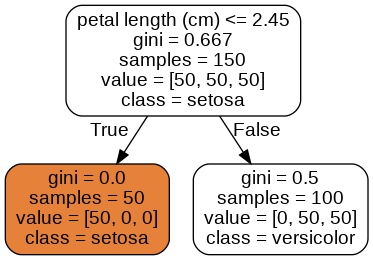

W głównym weźlę czyli korzeniu na wysokości 0 zostało zadane pytanie - czy długość płatka jest mniejsza niż 2,45 cm. Jeśli warunek jest spełniony znajdujemy się w liściu na wysokości 1. Drzewo przewiduje iż znajduje się to klasa setosa.
<p>
A co w przypadku, gdfy warunke nie zostaje spełiony i znajdujemy się w prawym liściu? Wskazana klasa to versicolor.

Teraz pozostaje zrozumieć czym są wszystkie pozostałe atrybuty znajdujące się w drzewie.


> Atrybut *sample* odpowiada za liczbę próbek uczących wyznaczonych dla danego węzła.<P>
> Atrubut *value* wskazuje jak wiele przykładów uczących z każdej klasy należy do danego węzła lub liścia. W przypadku liścia po lewej stronie mamy 50 próbek należących do klasy *setosa* oraz po 0 próbek należących do pozostałych klas. W przypadku prawego liścia jest 50 próbek należacych do klasy *versicolor* i 50 należacych do klasy *virginica*.

Widać teraz, że mamy tylko 2 liście i aż 3 klasy. Do tego jeden z liści zawiera po tyle samo próbek dwóch klas. Oznacza to, iż drzewo jest za płytkie i poziom zagłębienia oznaczany parametrem *max_depth* powinien zostać zwiększony.

Zanim do tego przejdziemy pozostaje do rozszyfrowania ostatni parametr: *gini* - jest on rozumiany jako miara zanieczyszczenia. Oznacza to, iż będzie wynosił 0 jeśli wszystkie próbki znajdujące się w danym węźle czy liściu będą przynależeć tylko do jednej klasy. Dobrym przykładem jest tutaj lewy liść dla którego wartość parametru *gini* jest równa 0.



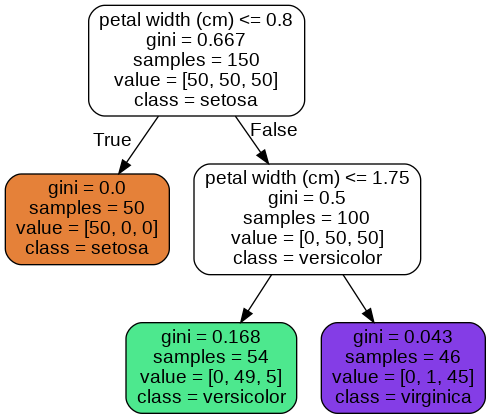

Widzimy, że zmieniło się pytanie zadawane w korzeniu oraz pojawiło się pytanie węźle na poziomie 1 oraz dwa dodatkowe liście wychodzące z tego węzła.
Zmieniły się również wartości atrybutów, zarówno *samples* jak i *gini*.

W jaki sposób szacować prawdopodobieństwo przynależności próbki do danej klasy dla drzew decyzyjnych?<P>
Wystarczy użyć  `.predict.proba()` podając jako agrumenty wartości danej próbki.
W wyniki otrzymane zostaną prawdopodobieństwa przynależności do klas występujących w danym drzewie. <p>
Z wykorzystaniem polecenia `predict()` i podając wartość otrzyma się konkretną przynależnośc do klasy. Wystarczy odpalić poniższą komórkę i zobaczyć jakie zostaną otrzymane wyniki.


In [ ]:
print(tree_clf.predict_proba([[8,0.5]]))
tree_clf.predict([[8,0.5]])

[[1. 0. 0.]]


array([0])

Teraz spróbujemy wykonać takie same operacje dotyczace tworzenia klasyfikatora, ale z wykorzystaniem algorytmu Random Forest.

Do tego celu wykorzystamy funkcję:
```
RandomForestClassifier(max_depth=2, random_state=0)
```

Więcej informacji dotyczących parametrów tej funkcji można znaleźć na stronie:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier


In [ ]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=109)


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

#print(clf.score)
#print(clf.predict([[0, 0, 0, 0]]))

tree = clf .estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = dataset.feature_names, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

y_pred= clf.predict(X_test)
print("Wektor etykiet dla danych testowych:",y_test)
print("Wektor etykiet wytypowany przez klasyfikator:",y_pred)
print('Accuracy:')
accuracy_score(y_test, y_pred)

Wektor etykiet dla danych testowych: [2 1 2 0 2 1 0 2 1 2 2 0 1 0 0]
Wektor etykiet wytypowany przez klasyfikator: [2 1 2 0 2 1 0 2 1 2 2 0 1 0 0]
Accuracy:


1.0

Zadanie 1

In [ ]:
print("Precision Score:", precision_score(y_test,y_pred, average='macro'))
print("Recall Score:", recall_score(y_test,y_pred, average='macro'))
print("F1 Score:", f1_score(y_test,y_pred, average = 'macro'))
print("Classification report:\n ", classification_report(y_test,y_pred))

Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Jak widać wektory zgadzają się ze sobą, a jak wygląd graficzna reprezentacja grafu takiego drzewa?
Wystarczy spojrzeć poniżej aby się przekonać. <p>
Jak widać nie zmieniło się wiele w prównaniu z algorytmem drzewa decyzyjnego.

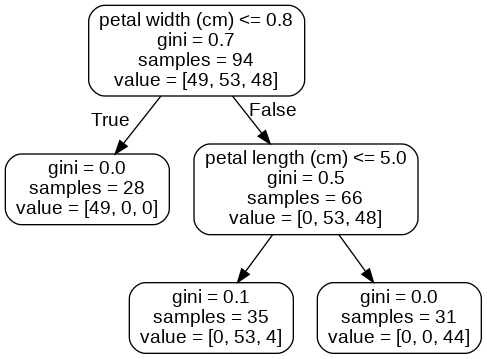

Skoro mamy za sobą wprowadzenie do drzew decyzyjnych, przejdziemy do konkretniejszych przykładów.
W tym celu wykorzystamy dataset diabetes, który jest udostępniony na stronie Kaggle na licencji C0.

In [ ]:
import pandas as pd

features = pd.read_csv('/content/drive/MyDrive/UM_LAB2/jupyternotebook/diabetes.csv')
features.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/UM_LAB2/jupyternotebook/diabetes.csv'

Wyśtwitlamy kształt naszego datasetu, mamy 8 cech i etykietę na końcu,w  sumie drugi wymiar to 9.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('The shape of our features is:', features.shape)
print('our features is:', features)

The shape of our features is: (768, 9)
our features is:      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0        

Testowo sprawdzamy statystykę danych z użyciem funkcji:
```
#features.describe()
```



In [ ]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dokonujemy przekształceń z wykorzystaniem biblioteki numpy, musimy rozdzelić etykiety od danych.

In [ ]:
# Wykorzystujemy bibliotekę numpy aby zamienić dane na tablice numpy
import numpy as np#
labels = np.array(features['Outcome'])# Usuwamy etykiety ze zbioru parametrów
# axis 1 odnosi sie do kolumn
features = features.drop('Outcome', axis = 1)#  Zostawiamy nazwy etykiet do wykorzystania później
feature_list = list(features.columns)# Właściwa konwersja na tablice numpy
features = np.array(features)

NameError: name 'features' is not defined

Standardowy podział danych z wykorzystaniem funkcji:
```
train_test_split()
```

In [ ]:
from sklearn.model_selection import train_test_split# Podział danych
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

NameError: name 'features' is not defined

Sprawdzmay jaki kształt mają dane po podziale, czy wartości dla etykiet zgadzają się z danymi.

In [ ]:
print('Kształt danych treningowych:', train_features.shape)
print('Kształt etykiet trenignowych:', train_labels.shape)
print('Kształt danych testowych:', test_features.shape)
print('Kształt etykiet testowych:', test_labels.shape)

Kształt danych treningowych: (576, 8)
Kształt etykiet trenignowych: (576,)
Kształt danych testowych: (192, 8)
Kształt etykiet testowych: (192,)


Dokonujemy właściwego importu modelu oraz trenignu.

In [ ]:
# Import wykorzystywanego modelu
from sklearn.ensemble import RandomForestClassifier# Wykorzystujemy algorytm Random Rofest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels);
predictions_forest = rf.predict(test_features)
print('Accuracy:')
accuracy_score(test_labels, predictions_forest)

NameError: name 'train_features' is not defined

Wynik accuracy nie jest najlepszy, ale w tej chwili nie jest to najistoniejsze.
Tworzymy graf wytrenowanego klasyfikatora. Najelpiej podejrzeć go otwierając po lewej stronie okno z danymi i pobierając plik randomtree.png

In [ ]:
# Import bibliotek niezbędnych do wizualizacji
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]# Wybór jednego z drzew z lasu
export_graphviz(tree, out_file = 'randomtree.dot', feature_names = feature_list, rounded = True, precision = 1)# Tworzymy graf z wykorzystaniem pliku dot
(graph, ) = pydot.graph_from_dot_file('randomtree.dot')# Zapis do pliku png
graph.write_png('randomtree.png')

Ze względu na wielkość otrzymanego drzewa dokonujemy zmniejszenia modelu. Powtarzamy czynności dla pliku small_tree.png

In [ ]:
# Zmniejszamy rozmiar drzewa do maksymalnej złożoności 3 poziomów
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Algortym losowych lasów posiada bardzo ciekawą właściwość. Z jego wykorzystaniemj można w łatwy sposób dokonać pomiaru względnej istotności każdej z cech zbioru. W przypadku modułu scikit-learn pomiar istotności to miara w jakim stopniu węzły we wszystkich drzewach w lesie zmniejszają zanieczyszczenie korzystając z tej cechy (zmiana atrybutu *gini*).
Gdyby spojrzeć na to z matematycznego punktu widzenia jest to nic innego jak średnia ważona przy założeniu, że waga każdego z węzłów jest równa liczbie powiązanych z danym węzłem próbek treningowych. Bardzo przydatną cechą w module scikit-learn jest fakt, iż automatycznie obliczany jest wynik dla każdej cechy po wykonaniu treningu i dodatkowo jest on skalowany przez co suma wszystkich istotności wynosi 1.

Wykorzystamy tę funkcję drzew losowych do obliczenia najistotniejszych cech w zbiorze.

In [ ]:
# Liczymy istotność parametrów z wykorzystaniem algorytmu losowych lasów
importances = list(rf.feature_importances_)# Lista krotek ze zmiennymi oraz istotnościami
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]#  Sortowanie istotności cech zaczynając od najbardziej istotnej cechy
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Wypisanie najistotniejszych cech wraz z istotnością
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

NameError: name 'rf' is not defined

Jak widać najistotniejszą cechą jest wartość glukozy, co w sumie nie powinno dziwić w przypadku klsyfikowania cukrzycy. Pozostałe cechy nie odbiegają od siebie istotnością w tak znaczący sposób. <P>
Można teraz sobie zadać pytanie, co by było gdyby dokonać treningu wykorzystując tylko najisotniejsze cech? Czy wyniki będą lepsze czy gorsze? A może czas treningu ulegnie zmianie?

In [ ]:
# Tworzymy nową instancję algorytmu losowego lasu wykorzystując tylko najistoniejsze cechy

rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)# Extract the two most important features
important_indices = [feature_list.index('Glucose'), feature_list.index('BMI')] # wybieramy tylko 2 najistotnijeszcze cechy - glukozę i BMI
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]# Trening
rf_most_important.fit(train_important, train_labels)# Predykcja wyników
predictions = rf_most_important.predict(test_important)
print('Accuracy:')
accuracy_score(test_labels, predictions)

Accuracy:


0.7291666666666666

Jak widać wartość miary accuracy pełnego modeli i trenowanego tylko z użyciem dwóch najistotniejszych cech nie odbiega od siebie znacząco. Oznacza to, iż lepiej korzystać z modelu, który jest prostszy obliczeniowo.
<P>
Zobaczmy jeszcze jak wyglądają pozostałe metryki, w tym celu skorzystajmy z funkcji:

```
# classification_report()
```
Ta funkcja wylicza wartośći miar f1, precison i recall dla poszczególnych klas oraz podaje liczbę sklasyfikownaych przypadków w postaci pola *support*.
Dodatkow wyliczane są średnie wartośći macro czyli uśrednianie średniej niezbalandsowanej dla każdej z etykiet oraz średniej ważonej, która uwzględnia ilość danych dla każdej z klas.



In [ ]:
classification_report(test_labels, predictions, output_dict= True, target_names=[0,1])

{0: {'precision': 0.7795275590551181,
  'recall': 0.8048780487804879,
  'f1-score': 0.792,
  'support': 123.0},
 1: {'precision': 0.6307692307692307,
  'recall': 0.5942028985507246,
  'f1-score': 0.6119402985074627,
  'support': 69.0},
 'accuracy': 0.7291666666666666,
 'macro avg': {'precision': 0.7051483949121744,
  'recall': 0.6995404736656062,
  'f1-score': 0.7019701492537314,
  'support': 192.0},
 'weighted avg': {'precision': 0.7260675348273774,
  'recall': 0.7291666666666666,
  'f1-score': 0.7272910447761195,
  'support': 192.0}}

Dla pewności można wykonać obliczenie macierzy pomyłek, w formie kodu.

In [ ]:
confusion_matrix(test_labels, predictions)

array([[99, 24],
       [28, 41]])

Oraz w znanej z wcześniejszego przykładu formie graficznej.

Text(0.5, 427.9555555555555, 'Etykieta przewidziana przez model')

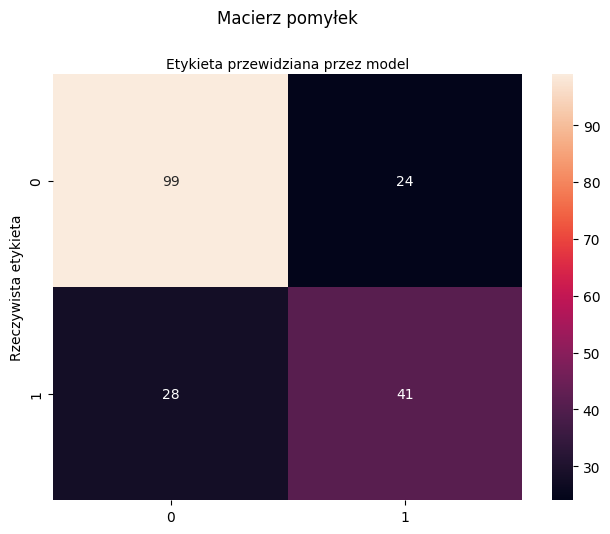

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = confusion_matrix(test_labels, predictions)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Dodatkowo, można wykreślić wykres istotności cech z wykorzystaniem biblioteki matplotlib.

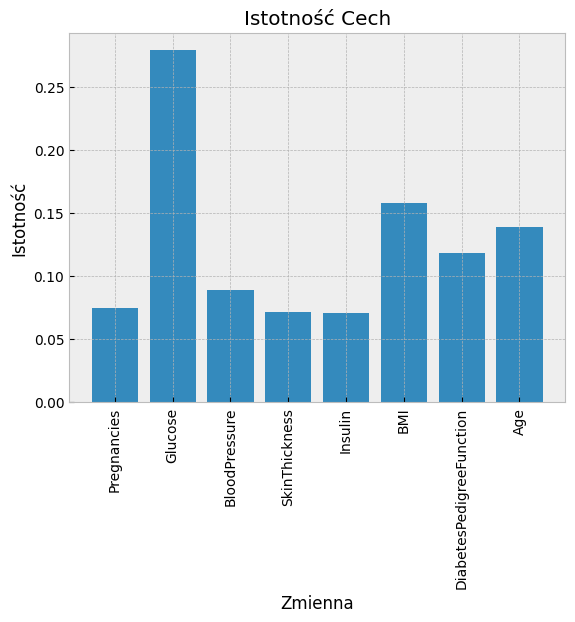

In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.parse_args([])

import matplotlib.pyplot as plt

plt.style.use('bmh')
x_values = list(range(len(importances)))# Tworzenie wykresu słupkowego
plt.bar(x_values, importances, orientation = 'vertical')# Podpisy osi dla osi X
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Istotność');
plt.xlabel('Zmienna');
plt.title('Istotność Cech');

<p><b>Zadanie 1</b></p>
Korzystając z pokazanych przykładów dopisać funkcje raportujące wyniki metryk i porównać z tymi w przykładzie. Wykorzystaj funkcję `classification_report` w jednej z pierwszych komórek, gdzie ładowano dataset Iris i wykorzystano tylko miarę accuracy.

<p><b>Zadanie 2</b></p>
Korzystając z innych parametrów niż *max_depth*, sprawdzić ich wpływ działania na klasyfikator w wybranym z przedstawionych w przykładzie datasetacie (Preferowany Diabetes).
Sprawdzić parametry:

> *min_samples_split* - odpowiadający za minimalną liczbe próbek znajdujących się w węźle zanim zostanie podzielony

>*min_samples_leaf* - minimalna liczbę próbek znajdujących się w liściu

>*max_leaf_nodes* - maksymalna liczba liści

>*max_features* - maksymalna liczba cech stosowana do dzielenia węzłów


<p><b>Zadanie 3</b></p>

Zamienić domyślny wskaźnik zanieczysczenia *gini* na *entropy* dla wybranego klasyfikatora w zbiorze Diabetes. Czy zaobserowano znaczącą różnicę w działaniu klasyfikatora?

<p><b>Zadanie 4</b></p>

Wykorzystując algorytm istotnośći cech wytrenować klasyfikator zawierający:


*   4 najlepsze cechy
*   2 najgorsze cechy

Jak zmiana tych parametów wpłyneła na metryki? Wykonaj zadanie dla zbioru Diabetes.



ZADANIE 2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

param_distrib = {'min_samples_split': randint(2,10),
                 'min_samples_leaf': randint(1,10),
                 'max_leaf_nodes': randint(0,1000),
                 'max_features': ('sqrt','log2')}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score,average='macro' ),
    'recall': make_scorer(recall_score,average='macro'),
}

rnd_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param_distrib,
                                n_iter = 10, scoring = scoring, cv=2,random_state=42, refit = 'accuracy')
rnd_search.fit(train_features, train_labels)
rnd_search.best_params_

{'max_features': 'log2',
 'max_leaf_nodes': 955,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [ ]:
result = rnd_search.cv_results_
result_df = pd.DataFrame(result)
result_df.sort_values(by='mean_test_accuracy', ascending = False, inplace = True)
result_df.head()
lables =  [ 'params', 'mean_test_precision', 'mean_test_accuracy', 'mean_test_recall']
best_params = rnd_search.best_params_
result_df[lables]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,...,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall
6,0.174504,0.006897,0.013803,0.000046,log2,955,5,2,"{'max_features': 'log2', 'max_leaf_nodes': 955...",0.770833,...,0.754212,0.779718,0.766965,0.012753,1,0.721489,0.752525,0.737007,0.015518,1
9,0.172594,0.003799,0.014654,0.000215,sqrt,510,3,5,"{'max_features': 'sqrt', 'max_leaf_nodes': 510...",0.791667,...,0.782522,0.749398,0.765960,0.016562,2,0.742128,0.726792,0.734460,0.007668,2
1,0.172639,0.001850,0.014053,0.000181,sqrt,614,3,8,"{'max_features': 'sqrt', 'max_leaf_nodes': 614...",0.777778,...,0.764647,0.752303,0.758475,0.006172,3,0.726809,0.734247,0.730528,0.003719,5
3,0.176378,0.005159,0.013364,0.000264,log2,871,8,4,"{'max_features': 'log2', 'max_leaf_nodes': 871...",0.777778,...,0.759104,0.748537,0.753820,0.005283,7,0.736170,0.729197,0.732683,0.003487,3
8,0.175620,0.000124,0.014057,0.000193,log2,856,1,4,"{'max_features': 'log2', 'max_leaf_nodes': 856...",0.781250,...,0.766610,0.743409,0.755010,0.011601,5,0.734149,0.728956,0.731553,0.002596,4


In [ ]:
def print_result(res, param):
  result_df = pd.DataFrame(res)
  result_df.sort_values(by='mean_test_accuracy', ascending = False, inplace = True)
  lables =  [ 'params', 'mean_test_precision', 'mean_test_accuracy', 'mean_test_recall', 'mean_fit_time']
  print(f"{param}  results: \n", result_df[lables])
  print("\n")

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score,average='macro' ),
    'recall': make_scorer(recall_score,average='macro'),
}

In [ ]:
param_distrib_splt = {'min_samples_split': randint(2,50),}
param_distrib_leaf = {'min_samples_leaf': randint(2,50),}
param_distrib_nodes = {'max_leaf_nodes': randint(2,100),}
param_distrib_max_features = {'max_features': randint(2,100),}

rnd_search_splt = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param_distrib_splt,
                                n_iter = 5, scoring = scoring, cv=2,random_state=42, refit = 'accuracy')
rnd_search_splt.fit(train_features, train_labels)

rnd_search_leaf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param_distrib_leaf,
                                n_iter = 5, scoring = scoring, cv=2,random_state=42, refit = 'accuracy')
rnd_search_leaf.fit(train_features, train_labels)

rnd_search_nodes = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param_distrib_nodes,
                                n_iter = 5, scoring = scoring, cv=2,random_state=42, refit = 'accuracy')
rnd_search_nodes.fit(train_features, train_labels)

rnd_search_features = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param_distrib_max_features,
                                n_iter = 5, scoring = scoring, cv=2,random_state=42, refit = 'accuracy')
rnd_search_features.fit(train_features, train_labels)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786096923690>},
                   random_state=42, refit='accuracy',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'precision': make_scorer(precision_score, response_method='predict', average=macro),
                            'recall': make_scorer(recall_score, response_method='predict', average=macro)})

In [ ]:
print_result(rnd_search_splt.cv_results_, 'min_samples_split')
print_result(rnd_search_leaf.cv_results_, 'min_samples_leaf')
print_result(rnd_search_nodes.cv_results_, 'min_leaf_nodes')
print_result(rnd_search_features.cv_results_, 'max_features')

min_samples_split  results: 
                       params  mean_test_precision  mean_test_accuracy  \
3  {'min_samples_split': 44}             0.771068            0.781250   
4   {'min_samples_split': 9}             0.761023            0.779514   
2  {'min_samples_split': 16}             0.754251            0.770833   
0  {'min_samples_split': 40}             0.756519            0.767361   
1  {'min_samples_split': 30}             0.748198            0.762153   

   mean_test_recall  mean_fit_time  
3          0.727385       0.186070  
4          0.736691       0.258144  
2          0.719338       0.164599  
0          0.707259       0.160592  
1          0.704493       0.165023  


min_samples_leaf  results: 
                      params  mean_test_precision  mean_test_accuracy  \
4   {'min_samples_leaf': 9}             0.756631            0.770833   
2  {'min_samples_leaf': 16}             0.756518            0.765625   
1  {'min_samples_leaf': 30}             0.750721            0.

ZADANIE 3

In [ ]:
rf = RandomForestClassifier(criterion = 'gini', random_state = 42)
rf.fit(train_features, train_labels);
predictions_forest = rf.predict(test_features)
print('Accuracy: ', accuracy_score(test_labels, predictions_forest))
print('Classification report: \n', classification_report(test_labels,predictions_forest))

Accuracy:  0.734375
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       123
           1       0.62      0.65      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.74       192



In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rf.fit(train_features, train_labels);
predictions_forest = rf.predict(test_features)
print('Accuracy: ', accuracy_score(test_labels, predictions_forest))
print('Classification report: \n', classification_report(test_labels,predictions_forest))

Accuracy:  0.7291666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



ZADANIE 4

In [ ]:
four_best = feature_importances[:4]
best =[]
for name, value in four_best:
  best.append(name)

In [ ]:
two_worst = feature_importances[-2:]
worst = []
for name, value in two_worst:
  worst.append(name)

In [ ]:
rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)# Extract the two most important features
important_indices = [feature_list.index(x) for x in best]
train_important = train_features[:, important_indices]
print("Four best features: ", important_indices)
test_important = test_features[:, important_indices]# Trening
rf_most_important.fit(train_important, train_labels)# Predykcja wyników
predictions = rf_most_important.predict(test_important)
print('Accuracy:')
accuracy_score(test_labels, predictions)

Four best features:  [1, 5, 7, 6]
Accuracy:


0.75

In [ ]:
rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)# Extract the two most important features
important_indices = [feature_list.index(x) for x in worst]
train_important = train_features[:, important_indices]
print("Two worst features: ", important_indices)
test_important = test_features[:, important_indices]# Trening
rf_most_important.fit(train_important, train_labels)# Predykcja wyników
predictions = rf_most_important.predict(test_important)
print('Accuracy:')
accuracy_score(test_labels, predictions)

Two worst features:  [3, 4]
Accuracy:


0.6458333333333334